In [345]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, normalize
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.base import TransformerMixin
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as IMBPipeline
from scipy.sparse import hstack

In [254]:
!pip install scikit-learn

In [216]:
df=pd.read_csv('new_train2.csv')

In [217]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,failure,no
2,55,retired,married,basic.4y,no,no,no,cellular,jul,mon,550,1,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,nonexistent,no
4,55,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,nonexistent,no


In [218]:
# Data Preprocessing
df['label'] = df['y'].apply(lambda x:1 if x=='yes' else 0)
del df['y']

most_frequent = df[df['default'] != 'unknown']['default'].mode()[0]
df['default'].replace('unknown', most_frequent, inplace=True)

df = df[(df['housing'] != 'unknown') & (df['loan'] != 'unknown') & (df['marital'] != 'unknown')]

print(df.describe())

                age      duration      campaign         label
count  32094.000000  32094.000000  32094.000000  32094.000000
mean      39.600548    227.892939      2.190067      0.112544
std        9.076459    158.806137      1.363494      0.316040
min       26.000000     36.000000      1.000000      0.000000
25%       32.000000    103.000000      1.000000      0.000000
50%       38.000000    180.000000      2.000000      0.000000
75%       47.000000    320.000000      3.000000      0.000000
max       55.000000    550.000000      5.000000      1.000000


In [219]:
X = df.iloc[:, 0:-1]
Y = df.iloc[:, -1]

In [224]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [220]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
numerical_features = ['age', 'duration', 'campaign']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [262]:
StandardScaler_method = StandardScaler()
StandardScaler_method.fit(X_train.loc[:,numerical_features])
X_train_numerical = StandardScaler_method.transform(X_train.loc[:,numerical_features])

In [263]:
StandardScaler_method.fit(X_test.loc[:,numerical_features])
X_test_numerical = StandardScaler_method.transform(X_test.loc[:,numerical_features])

In [309]:
X_train_numerical = normalize(X_train.loc[:,numerical_features], axis = 0)
X_test_numerical = normalize(X_test.loc[:,numerical_features], axis = 0)

In [319]:
X_train_numerical = X_train.loc[:,numerical_features]
X_test_numerical = X_test.loc[:,numerical_features]

In [329]:
OneHotEncoder = OneHotEncoder()
OneHotEncoder.fit(X_train.loc[:,categorical_features])
X_train_categorical = OneHotEncoder.transform(X_train.loc[:,categorical_features])

In [331]:
OneHotEncoder.fit(X_test.loc[:,categorical_features])
X_test_categorical = OneHotEncoder.transform(X_test.loc[:,categorical_features])

In [357]:
X_train_categorical_dense = X_train_categorical.toarray()
X_test_categorical_dense = X_test_categorical.toarray()

X_train_merged = np.hstack([X_train_numerical, X_train_categorical_dense])
X_test_merged = np.hstack([X_test_numerical, X_test_categorical_dense])

In [221]:
class DenseTransformer(TransformerMixin):
    def fit(self, X, Y=None, **fit_params):
        return self
    
    def transform(self, X, Y=None, **fit_params):
        return X.toarray()

In [222]:
# Random forest
# Support vector machine (SVM)
# Discriminant analysis (Regularized)
models = [
    (RandomForestClassifier(n_estimators=100, random_state=42), "Random Forest", False),
    (SVC(probability=True, random_state=42), "Support Vector Machine", False),
    (LinearDiscriminantAnalysis(), "Linear Discriminant Analysis", True)
]

## Random forest

In [230]:
steps = [('preprocessor', preprocessor)]
steps.append(('classifier', (RandomForestClassifier(n_estimators=100, random_state=42))))

# Train Model
pipeline.fit(X_train, Y_train)
Y_pred = pipeline.predict_proba(X_test)

In [233]:
Y_pred[0:10]

array([[0.99, 0.01],
       [0.98, 0.02],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.98, 0.02],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.88, 0.12],
       [0.95, 0.05],
       [0.89, 0.11]])

## Analysis

In [242]:
list_of_probability_of_GT0 = []
list_of_probability_of_GT1 = []
Y_test_array = Y_test.to_numpy()

for i, (prob0, prob1) in enumerate(Y_pred):
    current_GT_label = Y_test_array[i]
    if current_GT_label == 0:
        list_of_probability_of_GT0.append(prob0)
    else:
        list_of_probability_of_GT1.append(prob1)

list_of_probability_of_GT0.sort()
list_of_probability_of_GT1.sort()

In [243]:
list_of_probability_of_GT0[0]

0.1

In [244]:
list_of_probability_of_GT0[-1]

1.0

In [245]:
list_of_probability_of_GT0

[0.1,
 0.14,
 0.16,
 0.16,
 0.17,
 0.17,
 0.17,
 0.18,
 0.19,
 0.19,
 0.2,
 0.21,
 0.21,
 0.21,
 0.22,
 0.22,
 0.22,
 0.22,
 0.22,
 0.23,
 0.23,
 0.23,
 0.23,
 0.24,
 0.24,
 0.25,
 0.25,
 0.25,
 0.26,
 0.26,
 0.26,
 0.26,
 0.27,
 0.27,
 0.27,
 0.27,
 0.27,
 0.27,
 0.28,
 0.28,
 0.28,
 0.28,
 0.29,
 0.29,
 0.29,
 0.29,
 0.29,
 0.29,
 0.3,
 0.3,
 0.3,
 0.3,
 0.3,
 0.31,
 0.31,
 0.31,
 0.31,
 0.31,
 0.32,
 0.32,
 0.33,
 0.33,
 0.33,
 0.33,
 0.34,
 0.34,
 0.34,
 0.34,
 0.34,
 0.34,
 0.34,
 0.34,
 0.35,
 0.35,
 0.35,
 0.35,
 0.36,
 0.36,
 0.36,
 0.36,
 0.36,
 0.36,
 0.36,
 0.36,
 0.36,
 0.36,
 0.3633333333333333,
 0.365,
 0.36666666666666664,
 0.37,
 0.37,
 0.37,
 0.37,
 0.37,
 0.37,
 0.37,
 0.37,
 0.38,
 0.38,
 0.38,
 0.38,
 0.38,
 0.38,
 0.38,
 0.38,
 0.38,
 0.38,
 0.38,
 0.39,
 0.39,
 0.39,
 0.39,
 0.39,
 0.39,
 0.39,
 0.39,
 0.39,
 0.39,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.4,
 0.41,
 0.41,
 0.41,
 0.41,
 0.41,
 0

In [246]:
list_of_probability_of_GT1[0]

0.0

In [247]:
list_of_probability_of_GT1[-1]

0.94

## SVM

In [249]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
5082,39,technician,married,professional.course,no,yes,no,telephone,jun,wed,67,3,nonexistent
12602,29,technician,single,professional.course,no,no,no,cellular,aug,fri,245,1,nonexistent
18740,50,blue-collar,married,basic.4y,no,no,no,cellular,aug,mon,123,2,success
18431,35,self-employed,married,university.degree,no,yes,no,cellular,jul,thu,550,1,nonexistent
2618,32,blue-collar,married,basic.9y,no,no,no,cellular,apr,fri,334,2,nonexistent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30600,26,management,single,university.degree,no,yes,yes,cellular,jul,thu,550,2,nonexistent
5553,39,services,married,university.degree,no,yes,no,cellular,apr,thu,369,1,nonexistent
885,55,blue-collar,married,basic.4y,no,no,no,telephone,may,fri,159,1,nonexistent
16234,38,housemaid,divorced,university.degree,no,yes,no,cellular,may,wed,550,3,failure


In [253]:
preprocessor.fit_transform(X_train)

<22465x52 sparse matrix of type '<class 'numpy.float64'>'
	with 292045 stored elements in Compressed Sparse Row format>

In [252]:
list(X_train_processed)

[<1x52 sparse matrix of type '<class 'numpy.float64'>'
 	with 13 stored elements in Compressed Sparse Row format>,
 <1x52 sparse matrix of type '<class 'numpy.float64'>'
 	with 13 stored elements in Compressed Sparse Row format>,
 <1x52 sparse matrix of type '<class 'numpy.float64'>'
 	with 13 stored elements in Compressed Sparse Row format>,
 <1x52 sparse matrix of type '<class 'numpy.float64'>'
 	with 13 stored elements in Compressed Sparse Row format>,
 <1x52 sparse matrix of type '<class 'numpy.float64'>'
 	with 13 stored elements in Compressed Sparse Row format>,
 <1x52 sparse matrix of type '<class 'numpy.float64'>'
 	with 13 stored elements in Compressed Sparse Row format>,
 <1x52 sparse matrix of type '<class 'numpy.float64'>'
 	with 13 stored elements in Compressed Sparse Row format>,
 <1x52 sparse matrix of type '<class 'numpy.float64'>'
 	with 13 stored elements in Compressed Sparse Row format>,
 <1x52 sparse matrix of type '<class 'numpy.float64'>'
 	with 13 stored elements

## SVM

In [358]:
# Train Model
SVM_model = SVC(probability=True, random_state=42)
SVM_model.fit(X_train_merged, Y_train)
Y_pred = SVM_model.predict_proba(X_test_merged)

In [359]:
Y_pred1 = list(map(lambda x : 1 if x[1] > 0.5 else 0, Y_pred))

In [363]:
# Test Accuracy
print(f"{name} - Test Accuracy: {accuracy_score(Y_test, Y_pred1):.4f}")
print(classification_report(Y_test, Y_pred1))

Random Forest - Test Accuracy: 0.8980
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      8531
           1       0.61      0.29      0.40      1098

    accuracy                           0.90      9629
   macro avg       0.76      0.63      0.67      9629
weighted avg       0.88      0.90      0.88      9629



## Logistic Regression

In [370]:
lr_model = LogisticRegression(solver='liblinear', max_iter=1000)
lr_model.fit(X_train_merged, Y_train)
Y_pred = lr_model.predict_proba(X_test_merged)

In [371]:
Y_pred2 = list(map(lambda x : 1 if x[1] > 0.25 else 0, Y_pred))

In [372]:
# Test Accuracy
print(f"{name} - Test Accuracy: {accuracy_score(Y_test, Y_pred2):.4f}")
print(classification_report(Y_test, Y_pred2))

Random Forest - Test Accuracy: 0.8804
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      8531
           1       0.48      0.68      0.57      1098

    accuracy                           0.88      9629
   macro avg       0.72      0.79      0.75      9629
weighted avg       0.90      0.88      0.89      9629



## KNN

In [392]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_merged, Y_train)
Y_pred = knn_model.predict_proba(X_test_merged)

In [393]:
Y_pred3 = list(map(lambda x : 1 if x[1] > 0.5 else 0, Y_pred))

In [394]:
# Test Accuracy
print(f"{name} - Test Accuracy: {accuracy_score(Y_test, Y_pred3):.4f}")
print(classification_report(Y_test, Y_pred3))

Random Forest - Test Accuracy: 0.8777
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      8531
           1       0.43      0.22      0.29      1098

    accuracy                           0.88      9629
   macro avg       0.67      0.59      0.61      9629
weighted avg       0.85      0.88      0.86      9629



## Naive Bayes

In [395]:
nb_model = GaussianNB()
nb_model.fit(X_train_merged, Y_train)
Y_pred = nb_model.predict_proba(X_test_merged)

In [396]:
Y_pred4 = list(map(lambda x : 1 if x[1] > 0.5 else 0, Y_pred))

In [397]:
# Test Accuracy
print(f"{name} - Test Accuracy: {accuracy_score(Y_test, Y_pred4):.4f}")
print(classification_report(Y_test, Y_pred4))

Random Forest - Test Accuracy: 0.8568
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      8531
           1       0.39      0.44      0.41      1098

    accuracy                           0.86      9629
   macro avg       0.66      0.68      0.67      9629
weighted avg       0.87      0.86      0.86      9629



## Decision Tree

In [398]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_merged, Y_train)
Y_pred = dt_model.predict_proba(X_test_merged)

In [399]:
Y_pred5 = list(map(lambda x : 1 if x[1] > 0.5 else 0, Y_pred))

In [400]:
# Test Accuracy
print(f"{name} - Test Accuracy: {accuracy_score(Y_test, Y_pred5):.4f}")
print(classification_report(Y_test, Y_pred5))

Random Forest - Test Accuracy: 0.8692
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      8531
           1       0.43      0.42      0.42      1098

    accuracy                           0.87      9629
   macro avg       0.68      0.67      0.67      9629
weighted avg       0.87      0.87      0.87      9629



## Random forest

In [401]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_merged, Y_train)
Y_pred = rf_model.predict_proba(X_test_merged)

In [402]:
Y_pred6 = list(map(lambda x : 1 if x[1] > 0.5 else 0, Y_pred))

In [403]:
# Test Accuracy
print(f"{name} - Test Accuracy: {accuracy_score(Y_test, Y_pred6):.4f}")
print(classification_report(Y_test, Y_pred6))

Random Forest - Test Accuracy: 0.8974
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      8531
           1       0.58      0.35      0.44      1098

    accuracy                           0.90      9629
   macro avg       0.75      0.66      0.69      9629
weighted avg       0.88      0.90      0.89      9629



In [ ]:
# Confusion Matrix
cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title(f"Confusion Matrix for {name} with {strategy_name}")
plt.show()


=== Oversampling ===

Sampling Size:
label
0    19951
1    19951
Name: count, dtype: int64
Random Forest - Test Accuracy: 0.8930
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      8531
           1       0.53      0.48      0.51      1098

    accuracy                           0.89      9629
   macro avg       0.73      0.71      0.72      9629
weighted avg       0.89      0.89      0.89      9629



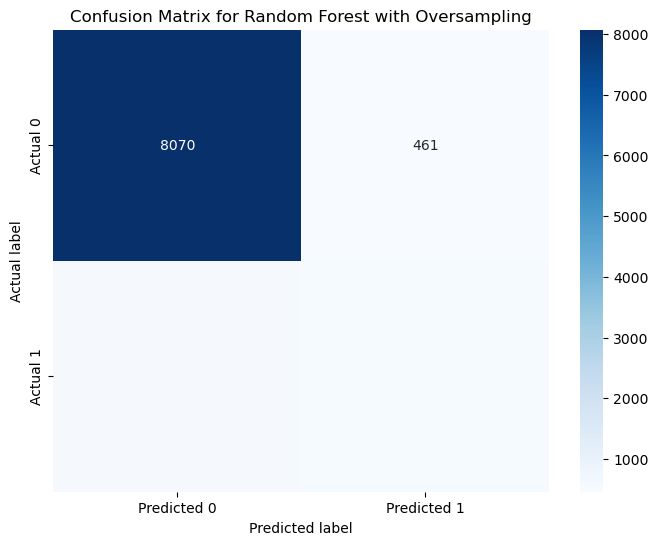

Support Vector Machine - Test Accuracy: 0.8388
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      8531
           1       0.40      0.85      0.55      1098

    accuracy                           0.84      9629
   macro avg       0.69      0.84      0.72      9629
weighted avg       0.91      0.84      0.86      9629



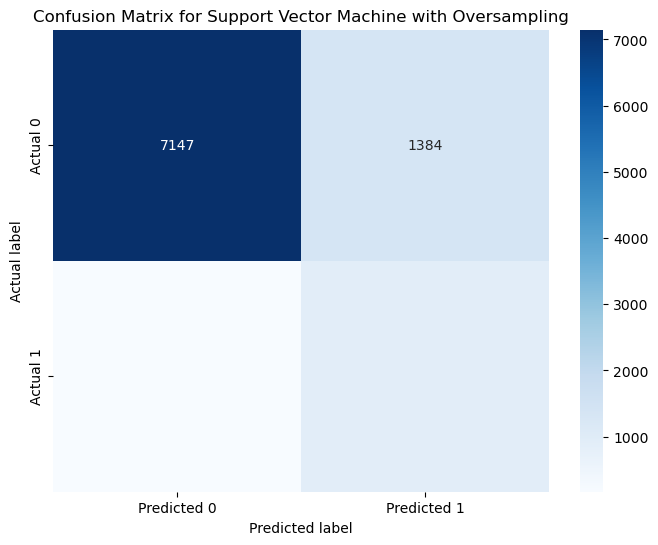

Linear Discriminant Analysis - Test Accuracy: 0.8171
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      8531
           1       0.37      0.84      0.51      1098

    accuracy                           0.82      9629
   macro avg       0.67      0.83      0.70      9629
weighted avg       0.91      0.82      0.84      9629



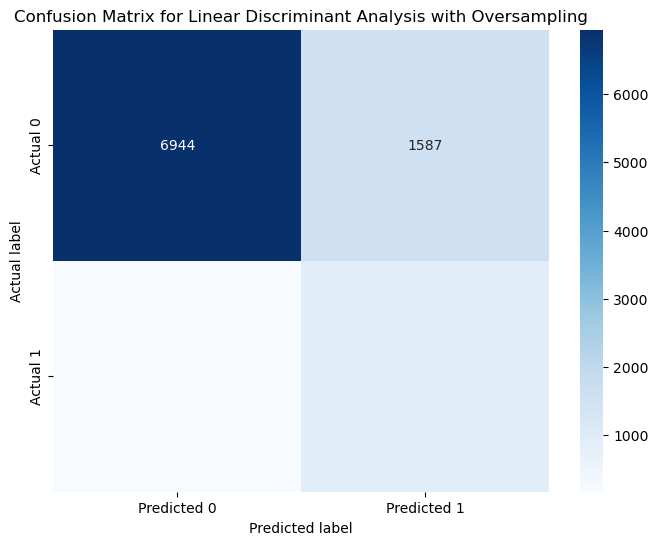


=== Undersampling ===

Sampling Size:
label
0    2514
1    2514
Name: count, dtype: int64


ValueError: Found unknown categories ['yes'] in column 3 during transform

In [225]:
for strategy_name, sampler in sampling_strategies.items():    
    for model, name, dense_transform in models:
        steps = [('preprocessor', preprocessor)]
        if dense_transform:
            steps.append(('to_dense', DenseTransformer()))
        steps.append(('classifier', model))

        pipeline = Pipeline(steps=steps) if not dense_transform else IMBPipeline(steps=steps)
        
        # Train Model
        pipeline.fit(X_resampled, Y_resampled)
        Y_pred = pipeline.predict(X_test)

        # Test Accuracy
        print(f"{name} - Test Accuracy: {accuracy_score(Y_test, Y_pred):.4f}")
        print(classification_report(Y_test, Y_pred))
        
        # Confusion Matrix
        cm = confusion_matrix(Y_test, Y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.title(f"Confusion Matrix for {name} with {strategy_name}")
        plt.show()